First, I want to have an overview of monthly spend and monthly transaction count across all card counts (see faceted scatter plots) <br>
<br>I will remove the outliers, before I apply statistical techniques to check if trendline is drastically changed. <br> I will then proceed to apply statistical Pearson Correlation Coefficient and P-value to check if monthly spend / transaction count increases as the number of cards per user increase.



In [1]:
import pandas as pd

# Loading my dataframe
df = pd.read_csv("/Users/ams/Downloads/Final Queries/transactions_spend_cardcount.csv")

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

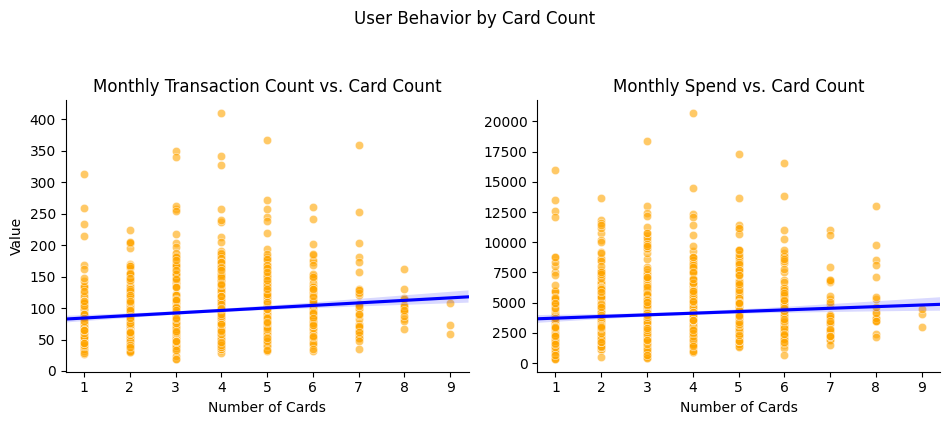

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape the data to long format for faceting
df_long = pd.melt(
    df,
    id_vars='cardcount_issued',
    value_vars=['monthly_trans', 'monthly_spend'],
    var_name='metric',
    value_name='value'
)

# Create faceted scatter plots
g = sns.FacetGrid(df_long, col='metric', sharex=True, sharey=False, height=4, aspect=1.2)
g.map_dataframe(sns.scatterplot, x='cardcount_issued', y='value', alpha=0.6, color='orange')
g.map_dataframe(sns.regplot, x='cardcount_issued', y='value', scatter=False, color='blue', truncate=False)

# Set plot labels
g.set_axis_labels("Number of Cards", "Value")

# Custom titles for each facet
title_map = {
    'monthly_trans': 'Monthly Transaction Count vs. Card Count',
    'monthly_spend': 'Monthly Spend vs. Card Count'
}
for ax, title in zip(g.axes.flat, g.col_names):
    ax.set_title(title_map[title])

# Overall title
g.fig.suptitle("User Behavior by Card Count", y=1.05)

plt.tight_layout()
plt.show()


Here,I am now removing outliers from both card counts and monthly spend to check if this will drastically change the trendline

In [4]:
def remove_outliers_iqr(df, columns):
    filtered_df = df.copy()
    for column in columns:
        Q1 = filtered_df[column].quantile(0.25)
        Q3 = filtered_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered_df = filtered_df[(filtered_df[column] >= lower_bound) & (filtered_df[column] <= upper_bound)]
    return filtered_df

# Remove outliers from 'yearly_income' and 'card_count' columns
cleaned_df = remove_outliers_iqr(df, ['cardcount_issued', 'monthly_spend'])

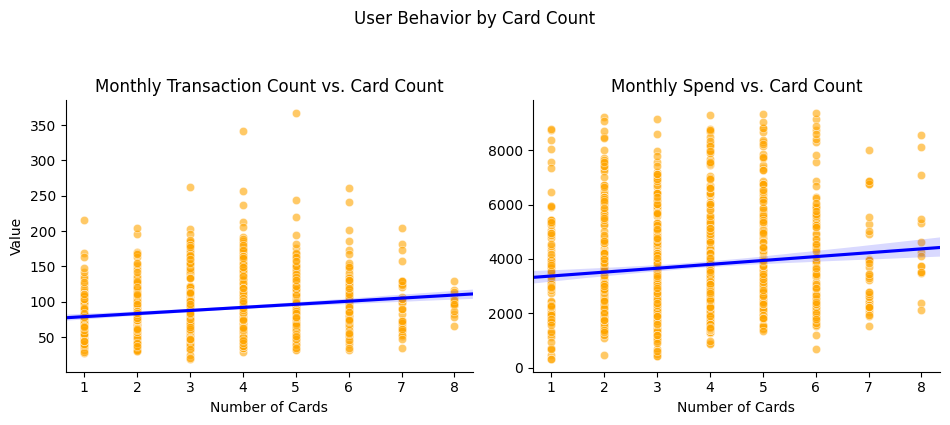

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reshape the data to long format for faceting
df_long = pd.melt(
    cleaned_df,
    id_vars='cardcount_issued',
    value_vars=['monthly_trans', 'monthly_spend'],
    var_name='metric',
    value_name='value'
)

# Create faceted scatter plots
g = sns.FacetGrid(df_long, col='metric', sharex=True, sharey=False, height=4, aspect=1.2)
g.map_dataframe(sns.scatterplot, x='cardcount_issued', y='value', alpha=0.6, color='orange')
g.map_dataframe(sns.regplot, x='cardcount_issued', y='value', scatter=False, color='blue', truncate=False)

# Set plot labels
g.set_axis_labels("Number of Cards", "Value")

# Custom titles for each facet
title_map = {
    'monthly_trans': 'Monthly Transaction Count vs. Card Count',
    'monthly_spend': 'Monthly Spend vs. Card Count'
}
for ax, title in zip(g.axes.flat, g.col_names):
    ax.set_title(title_map[title])

# Overall title
g.fig.suptitle("User Behavior by Card Count", y=1.05)

plt.tight_layout()
plt.show()


#### Applying statistical techniques for Monthly spend

In [6]:
# Compute Pearson correlation
from scipy.stats import pearsonr
corr_coef, p_value = pearsonr(cleaned_df["cardcount_issued"], cleaned_df["monthly_spend"])

In [7]:
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.11795255578380084
P-value: 5.402911591241536e-05


#### Applying statistical techniques for Monthly Transactions

In [8]:
# Compute Pearson correlation
from scipy.stats import pearsonr
corr_coef, p_value = pearsonr(cleaned_df["cardcount_issued"], cleaned_df["monthly_trans"])

In [9]:
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.16961775159758036
P-value: 5.610916505516846e-09


In [10]:
cleaned_df.head()

,client_id,cardcount_trans,cardcount_issued,total_trans,monthly_trans,total_spend,monthly_spend
0,0,2,4,12795,108.4322,625799.67,5303.387034
1,1,3,3,10073,85.3644,336187.37,2849.045508
2,2,5,5,10612,89.9322,291534.27,2470.629407
3,3,4,4,6001,50.8559,280685.46,2378.690339
4,4,4,5,15043,127.4831,595722.36,5048.494576


In [16]:
average_monthly_spend = cleaned_df['monthly_trans'].mean()


In [17]:
average_monthly_spend


np.float64(90.61992246998284)